## Top-level Global Var

In [1]:
DEBUG = 8

## Imports

In [2]:
import argparse
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import os
from os.path import dirname
import random
import torch
import torchvision
# from torch.utils.tensorboard import SummaryWriter
import tqdm

if DEBUG>0:
    from utils.models1 import Classifier
else:
    from utils.models import Classifier
from utils.dataset import NCaltech101
from utils.loader import Loader
from utils.train_eval import train_one_epoch, eval_one_epoch

if DEBUG>=8:
    if DEBUG==9:
        seed = 1586354275
    else:
        import time
        seed = int( time.time())
    print("Seed: %d" % seed)
    random.seed(seed)
    torch.manual_seed(seed)
    np.random.seed(seed)

Seed: 1586420262


In [3]:
class FLAGS:
    test_dataset = 'N-Caltech101/testing'
    device = 'cuda'
    num_workers = 0
    pin_memory = True
    batch_size = 8
    checkpoint = 'log/model_best.pth'
    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print(f"----------------------------\n"
                  f"Starting testing with \n"
                  f"batch_size: {self.batch_size}\n"
                  f"device: {self.device}\n"
                  f"checkpoint: {flags.checkpoint}\n"
                  f"test_dataset: {self.test_dataset}\n"
                  f"num_workers: {self.num_workers}\n"
                  f"pin_memory: {self.pin_memory}\n"
                  f"----------------------------")

In [4]:
flags = FLAGS()

# datasets
test_dataset = NCaltech101(flags.test_dataset)

datasetClasses = test_dataset.getClasses()

# construct loader, handles data streaming to gpu
test_loader = Loader(test_dataset, flags, device=flags.device)

# model, and put to device
model = Classifier(device=flags.device)
model = model.to(flags.device)

----------------------------
Starting training with 
num_epochs: 200
batch_size: 8
device: cpu
log_dir: log/temp
training_dataset: N-Caltech101/training
validation_dataset: N-Caltech101/validation
num_workers: 0
pin_memory: True
----------------------------


tensor([ 22,   3,  42, 100,   5,  94,  87,   5])


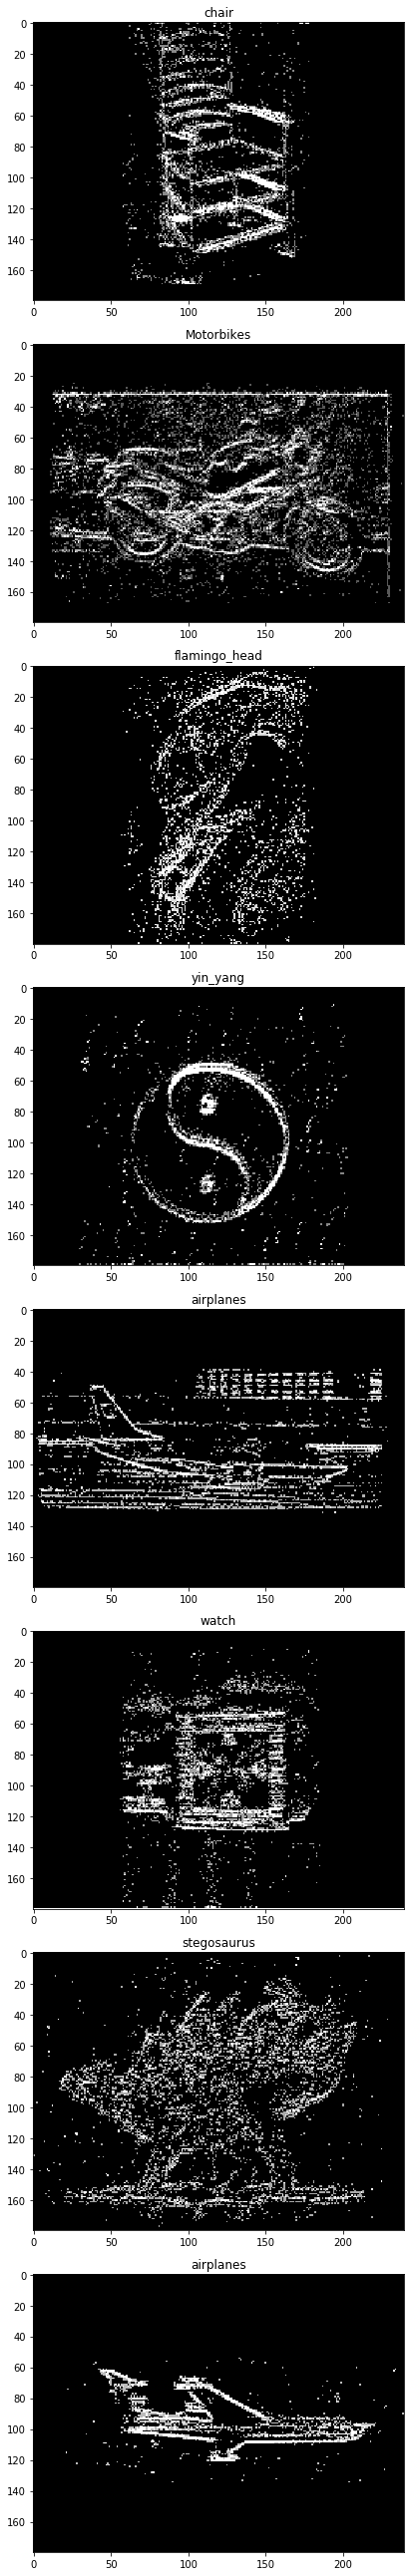

In [6]:
""" Visualization of test set """
itr = iter(test_loader)
events, labels = next(itr)
model.setMode(1)
preprocessed = model.quantization_layer.forward(events)
preprocessed = preprocessed.cpu().numpy()

print(labels)

fig = plt.figure(figsize=(18, 36))
ax = []
rows = 8
columns = 1
for i in range(rows * columns):
    ax.append( fig.add_subplot(rows, columns, i+1))
    ax[-1].set_title( datasetClasses[ labels[i].item()])
    plt.imshow(preprocessed[i][0], cmap='gray', vmin=0, vmax=1)
plt.tight_layout()
plt.show()

In [7]:
model = model.eval()
model.setMode(1)
test_loss, test_accuracy = eval_one_epoch(model, flags.device, test_loader)
print(f"Test Loss {test_loss:.4f}  Accuracy {test_accuracy:.4f}")

  0%|                                                                                          | 0/545 [00:00<?, ?it/s]

Training step [  0/200]


  3%|██▊                                                                              | 19/545 [01:12<34:45,  3.96s/it]

KeyboardInterrupt: 